# Distance plot

This notebook is used to visualize the program code in the latent space, after extracting of the embeddings. 

The input to this script is a .csv file with the embeddings vector. 

In [13]:

# importing and setting up the libraries
import pandas as pd
import numpy as np

# isualization libraries
import matplotlib.pyplot as plt
import matplotlib
import random
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
sns.set()

# t-SNE library for dimensionality reduction
from sklearn.manifold import TSNE

# clustering algorithms for dendrograms
# which is the last visualization in this file
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# pretty print is used to make the vectors look better
# when printed on the screen
import pprint
pp = pprint.PrettyPrinter(indent = 2)

# set the random seed
random.seed(343435)

## Step 1: Load data

In [1]:
# empty dictionary for the embeddings
embeddings_data = {}

In [5]:
# fill the dictionary with the data from the industry data
embeddings_data["Code fragments embeddings (CSP and ED)"] = pd.read_csv("data/df_csv_ed.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (CSP and ED)"]['label'].replace("CSV", "CSP", inplace=True)
embeddings_data["Code fragments embeddings (CSP and ED)"]

# after this code, the dataframe with the embeddings should be shown below


,label,modified,emb
0,singleton,1,[-1.0952334 0.7066669 0.4120876 ... 0.21...
1,singleton,1,[-1.6358188 0.14556593 0.8272225 ... -0.47...
2,singleton,1,[-1.0289481 0.5274043 0.562506 ... 0.21...
3,singleton,1,[-0.84627134 1.1986425 -0.4024312 ... -0.19...
4,singleton,1,[-0.37643763 0.84910935 -0.4464424 ... 0.10...
...,...,...,...
59,CSP,6,[-0.13400032 0.8639694 -0.19349676 ... -0.37...
60,CSP,6,[-0.4821187 0.5825671 -1.3810664 ... -0.70...
61,CSP,6,[-0.57890534 1.7349956 -1.0197624 ... -0.46...
62,CSP,6,[-0.57890534 1.7349956 -1.0197624 ... -0.46...


In [6]:
# read the ED module data only
embeddings_data["Code fragments embeddings (ED)"] = pd.read_csv("data/df_onlyed.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (ED)"]

,label,modified,emb
0,singleton,1,[-1.0952334 0.7066669 0.4120876 ... 0.21...
1,singleton,1,[-1.6358188 0.14556593 0.8272225 ... -0.47...
2,singleton,1,[-1.0289481 0.5274043 0.562506 ... 0.21...
3,singleton,1,[-0.84627134 1.1986425 -0.4024312 ... -0.19...
4,singleton,1,[-0.37643763 0.84910935 -0.4464424 ... 0.10...
5,singleton,1,[-0.7092163 1.519714 -1.0647081 ... -0.67...
6,singleton,1,[ 0.08267485 0.88162625 0.02244954 ... -0.84...
7,singleton,1,[-1.1603374 0.7830382 -0.00511622 ... -0.27...
8,singleton,1,[-0.6945424 0.33243012 -0.12148018 ... -1.02...
9,singleton,1,[-0.0167221 0.56745267 -0.16348231 ... 0.66...


In [7]:
# read the CSP data only
embeddings_data["Code fragments embeddings (CSP)"] = pd.read_csv("data/df_onlycsv.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (CSP)"]['label'].replace("CSV", "CSP", inplace=True)
embeddings_data["Code fragments embeddings (CSP)"]

,label,modified,emb
0,singleton,1,[-1.0952334 0.7066669 0.4120876 ... 0.21...
1,singleton,1,[-1.6358188 0.14556593 0.8272225 ... -0.47...
2,singleton,1,[-1.0289481 0.5274043 0.562506 ... 0.21...
3,singleton,1,[-0.84627134 1.1986425 -0.4024312 ... -0.19...
4,singleton,1,[-0.37643763 0.84910935 -0.4464424 ... 0.10...
5,singleton,1,[-0.7092163 1.519714 -1.0647081 ... -0.67...
6,singleton,1,[ 0.08267485 0.88162625 0.02244954 ... -0.84...
7,singleton,1,[-1.1603374 0.7830382 -0.00511622 ... -0.27...
8,singleton,1,[-0.6945424 0.33243012 -0.12148018 ... -1.02...
9,singleton,1,[-0.0167221 0.56745267 -0.16348231 ... 0.66...


## Step 2: visualization
Now we can visualize the distances on a 2D space. For that, we use the t-SNE dimensionality reduction technique. 

In [9]:
# setting up the figure to contain three diagrams 
# in one row on a white background
fig = plt.figure(constrained_layout=True, figsize=(15,4.5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")

# transform each type of pattern into one matrix
# based on the label in the .csv file
for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]

    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

    # Create a t-SNE model and transform the data
    tsne = TSNE(n_components=2, 
                perplexity=15, 
                random_state=42, 
                init='random', 
                learning_rate=200)

    vis_dims = tsne.fit_transform(matrix)

    colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
    x = [x for x,y in vis_dims]
    y = [y for x,y in vis_dims]

    color_indices = df.modified.values

    colormap = matplotlib.colors.ListedColormap(colors)

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)

    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
    for score in [0,1]:
        color = colors[score]
    ax.set_title(f"{model} - t-SNE (2D)")

    # zip joins x and y coordinates in pairs
    iIndex = 0
    for x,y in vis_dims:

        label = df.iloc[iIndex].label
        iIndex +=1

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./tsne-csv_ed_both.pdf")
plt.show()
plt.close()


0 Code fragments embeddings (CSP and ED)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 1)

<Figure size 1500x450 with 0 Axes>

In [10]:
# since t-SNE does not preserve the distances, 
# we also use the PCA, which is linear, but preserves distances
fig = plt.figure(constrained_layout=True, figsize=(15,4.5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")

for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]
    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


    # Create a PCA model and transform the data
    pcaComp = PCA(n_components=2,
              random_state=42)

    vis_dims = pcaComp.fit_transform(matrix)
    print(vis_dims.shape)

    colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
    x = [x for x,y in vis_dims]
    y = [y for x,y in vis_dims]

    color_indices = df.modified.values

    colormap = matplotlib.colors.ListedColormap(colors)

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)


    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
    for score in [0,1]:
        color = colors[score]
    ax.set_title(f"{model} - PCA (2 components)")

    # zip joins x and y coordinates in pairs
    iIndex = 0
    for x,y in vis_dims:

        label = df.label.tolist()[iIndex]
        #print(label)
        iIndex +=1

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./pca-ed_csv_all.pdf")
plt.show()
plt.close()


0 Code fragments embeddings (CSP and ED)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 1)

<Figure size 1500x450 with 0 Axes>

(64, 2)


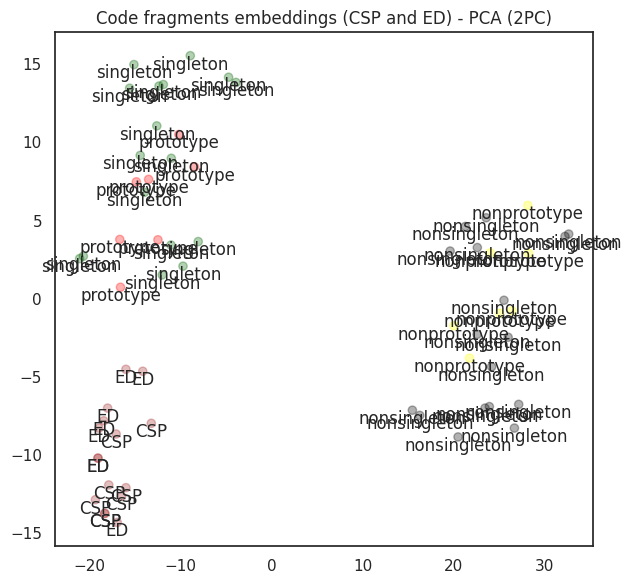

In [19]:
# the following diagram makes one of the patterns more visible
# but it's the same visualization as before
fig = plt.figure(constrained_layout=True, figsize=(6.5,6))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]
# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


# Create a PCA model and transform the data
pcaComp = PCA(n_components=2,
          random_state=42)

vis_dims = pcaComp.fit_transform(matrix)
print(vis_dims.shape)

colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

color_indices = df.modified.values

colormap = matplotlib.colors.ListedColormap(colors)

ax = fig.add_subplot(spec[0, 0])
ax.grid(False)


plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1]:
    color = colors[score]
ax.set_title(f"{model} - PCA (2PC)")

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y in vis_dims:

    label = df.label.tolist()[iIndex]
    #print(label)
    iIndex +=1

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./pca-ed_csp_all.pdf")
plt.show()
plt.close()


## Step 3: Visualization using dendrograms
Our final visualization of the distances is the dendrogram. 

In the dendrogram, we can check how close/distant the programs are to one another. 

0 Code fragments embeddings (CSP and ED)
['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP']
1 Code fragments embeddings (CSP)
['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singl

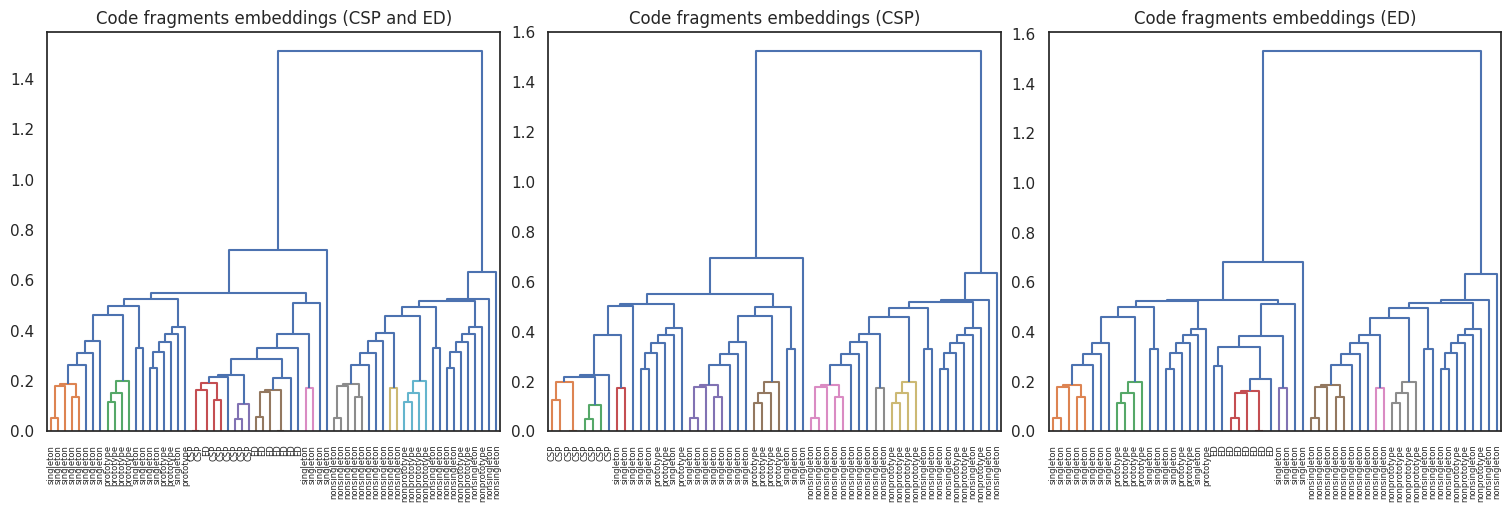

In [10]:
color_thresholds = {
    "Code fragments embeddings (CSP and ED)": 0.2,
    "Code fragments embeddings (CSP)": 0.2,
    "Code fragments embeddings (ED)": 0.2,
}


fig = plt.figure(constrained_layout=True, figsize=(15,5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")

for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]
   
    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)

    X = matrix
    Z = linkage(X, metric='cosine', method="average")
    print(df.label.tolist())

    ax.set_title(f"{model}")
    #dendrogram(Z, labels=[ x if x != "Singleton" else "S" for x in df.ID.tolist()], 
    dendrogram(Z, labels= df.label.tolist(),
            distance_sort='descending',
                show_leaf_counts=True, leaf_rotation=90, color_threshold=color_thresholds[model])

plt.savefig("./dendrogram-csv-ed-all.pdf")
plt.show()
plt.close()


['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP']


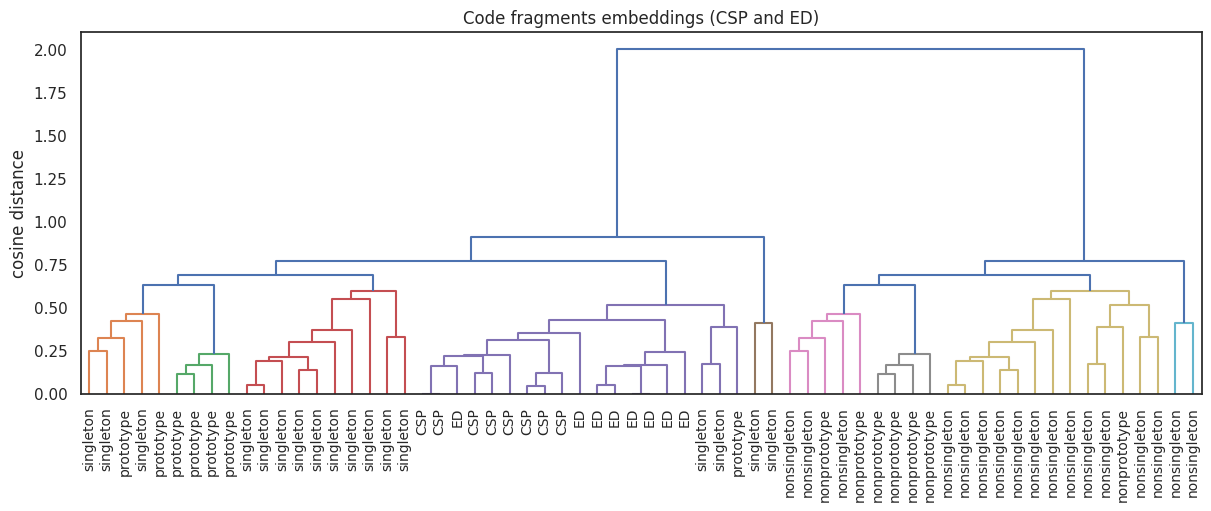

In [37]:
# now, let's visualize the requirements using t-SNE
# please note that the t-SNE does not preserve any distances
color_thresholds = {
    "Code fragments embeddings (CSP and ED)": 0.6,
    "Code fragments embeddings (CSP)": 0.2,
    "Code fragments embeddings (ED)": 0.2,
}


fig = plt.figure(constrained_layout=True, figsize=(12,5))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]

# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

ax = fig.add_subplot(spec[0, 0])
ax.grid(False)

X = matrix
Z = linkage(X, metric='cosine', method="complete")
print(df.label.tolist())

ax.set_title(f"{model}")
#dendrogram(Z, labels=[ x if x != "Singleton" else "S" for x in df.ID.tolist()], 
dendrogram(Z, labels= df.label.tolist(),
        distance_sort='descending',
            show_leaf_counts=True, leaf_rotation=90, color_threshold=color_thresholds[model],
            leaf_font_size=10)
ax.set_ylabel("cosine distance")

plt.savefig("./dendrogram-csp-ed-all.pdf")
plt.show()
plt.close()


## Step 4: 3D visualization
The last visualization is a 3D visualization of the embeddings. We use PCA as dimensionality reduction technique.

(64, 3)


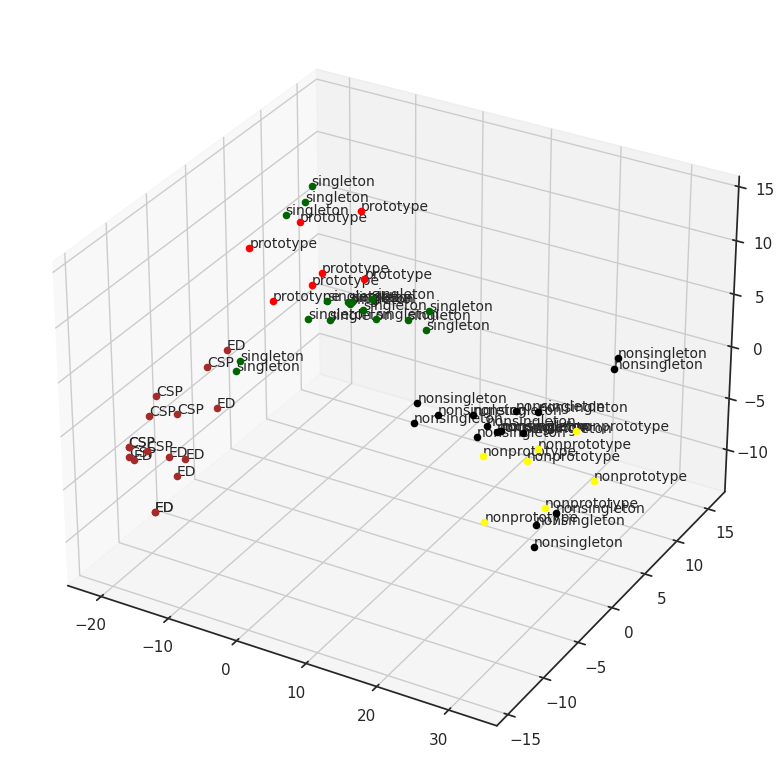

In [77]:
fig = plt.figure(constrained_layout=True, figsize=(8,8))
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]
# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


# Create a PCA model and transform the data
pcaComp = PCA(n_components=3,
          random_state=42)

vis_dims = pcaComp.fit_transform(matrix)
print(vis_dims.shape)

colors = ["red", "darkgreen", "black", "yellow", "blue", "brown", "brown"]
x = [x for x,y,z in vis_dims]
y = [y for x,y,z in vis_dims]
z = [y for x,y,z in vis_dims]

color_indices = df.modified.values

colormap = matplotlib.colors.ListedColormap(colors)

ax = plt.axes(projection='3d')
#ax.grid(False)

#ax.scatter3D(x, y, z, c=color_indices, cmap=colormap);
# plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
# for score in [0,1]:
#     color = colors[score]
# ax.set_title(f"{model} - PCA (3PC)")

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y,z in vis_dims:

    label = df.label.tolist()[iIndex]
    modified = df.modified.tolist()[iIndex]

    #print(label)
    iIndex +=1
    ax.scatter(x, y, z, color=colors[modified])
    ax.text(x, y, z, label, zorder=1, size=10)
#     plt.annotate(label, # this is the text
#                 (x,y,z), # these are the coordinates to position the label
#                 textcoords="offset points", # how to position the text
#                 xytext=(0,-10), # distance from text to points (x,y)
#                 ha='center') # horizontal alignment can be left, right or center
#ax.view_init(20, 280)
plt.tight_layout()
plt.savefig("./pca-ed_csp_all.pdf")
plt.show()
plt.close()